# Chapter 1

In [47]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

We're working with the Beta-Binomial model. It's used to model binary, mutually-exclusive outcomes.

$\theta \sim Beta(\alpha, \beta)$

$Y \sim Bin(n = 1, p = \theta)$

Code 1.1

I chose to replace the variable `Y` that the book chose and use `data` instead to be more explicit. 

In [1]:
def post(theta, data, alpha=1, beta=1):
    if 0 <= theta <= 1:
        prior = stats.beta(alpha, beta).pdf(theta)
        likelihood = stats.bernoulli(theta).pmf(data).prod()
        prob = likelihood * prior
    else:
        prob = -np.inf
    return prob

Code 1.2

In [41]:
data = stats.bernoulli(0.7).rvs(20)
data

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1])

In [42]:
n_iters = 1000
can_sd = 0.05
alpha = 1
beta = 1
theta = 0.5
trace = {'theta':np.zeros(n_iters)}
p2 = post(theta, data, alpha, beta)

for iteration in range(n_iters):
    theta_can = stats.norm(theta, can_sd).rvs(1)
    p1 = post(theta_can, data, alpha, beta)
    pa = p1/p2
    
    if pa > stats.uniform(0, 1).rvs(1):
        theta = theta_can
        p2 = p1
    
    trace['theta'][iteration] = theta
    

Code 1.4

(array([0.07592881, 0.26575084, 0.6264127 , 1.46162962, 2.44870417,
        3.72051177, 4.32794226, 2.88529484, 2.35379316, 0.81623472]),
 array([0.35968836, 0.41236928, 0.46505021, 0.51773113, 0.57041206,
        0.62309298, 0.67577391, 0.72845483, 0.78113576, 0.83381668,
        0.8864976 ]),
 <BarContainer object of 10 artists>)

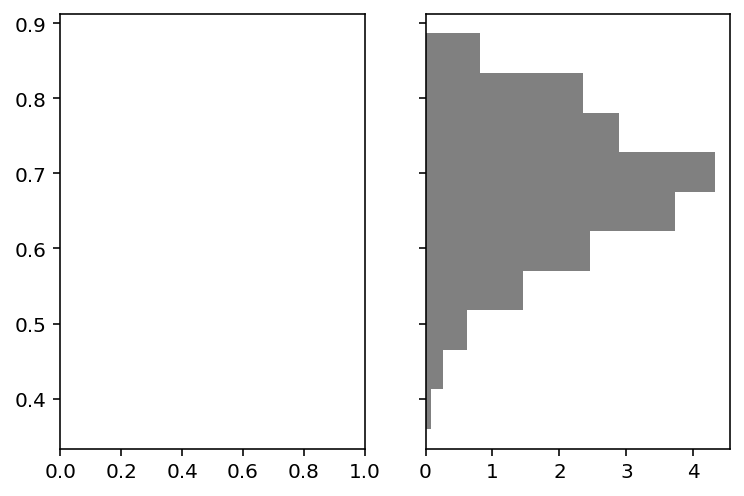

In [48]:
_, axes = plt.subplots(1, 2, sharey=True)
axes[1].hist(trace['theta'], color='0.5', orientation='horizontal', density=True)

In [49]:
az.summary(trace, kind='stats', round_to=2)

,mean,sd,hdi_3%,hdi_97%
theta,0.68,0.1,0.51,0.85


<AxesSubplot:title={'center':'theta'}>

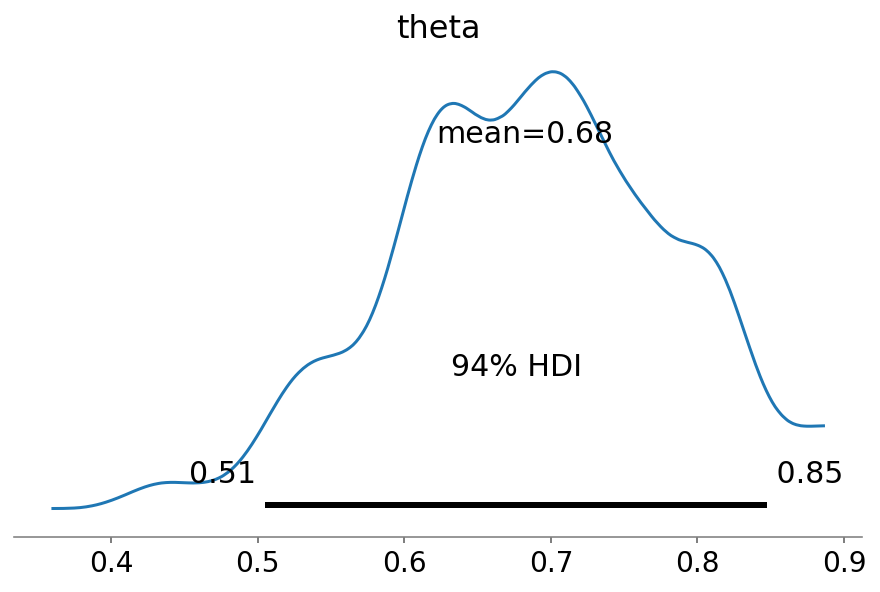

In [52]:
az.plot_posterior(trace)